In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

## TEXT PRE-PROCESSING
### Görev 1: Metin ön işleme işlemleri.
        # 1. amazon.xlsx datasını okutunuz.
        # 2. "Review" değişkeni üzerinde
            # a. Tüm harfleri küçük harfe çeviriniz
            # b. Noktalama işaretlerini çıkarınız
            # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
            # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
            # e. 1000'den az geçen kelimeleri veriden çıkarınız
            # f. Lemmatization işlemini uygulayınız

In [2]:
# Görev 1 Amazon datasını okuma
file_path = "../datasets/KOZMOS-CaseStudy/amazon-221126-161000/amazon.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [4]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [5]:
# Görev 2
###############################
# Normalizing Case Folding
###############################
df["Review"] = df["Review"].str.lower()

In [8]:
# Punctuations
df["Review"] = df["Review"].str.replace('[^\w\s]', '', regex=True)

In [10]:
# Numbers
df["Review"] = df["Review"].str.replace('\d', '', regex=True)

In [13]:
# Stopwords
sw = stopwords.words('english')
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in str(x).split() if i not in sw))

In [19]:
# Rarewords / Custom Words
sil = pd.Series(" ".join(df["Review"]).split()).value_counts()[-1000:]
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in str(x).split() if i not in sil))

In [22]:
# Lemmatization
" ".join(Word(word).lemmatize() for word in "good quality material however panels mismatched".split())

'good quality material however panel mismatched'

In [23]:
df["Review"] = df["Review"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


# # Görev 2: Metin Görselleştirme

# Adım 1: Barplot görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
        # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
        # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.


In [33]:
tf = df["Review"].apply(lambda x: pd.Series(x.split()).value_counts()).sum(axis=0).reset_index()

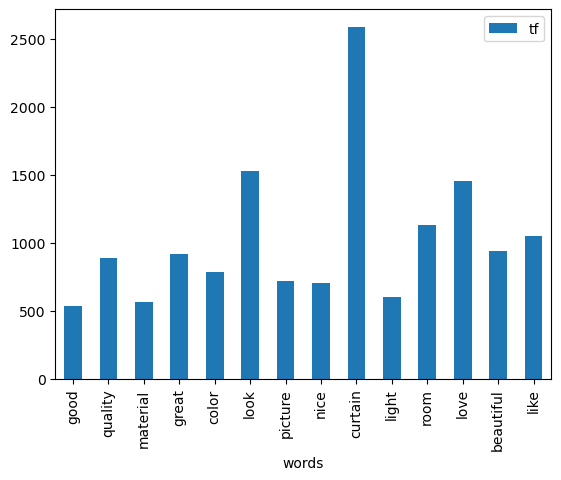

In [37]:
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

# Wordcloud

# Görev 3: WordCloud görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
        # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
        # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
        # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)


In [40]:
text = " ".join(i for i in df.Review)

In [42]:
wordCloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(text)

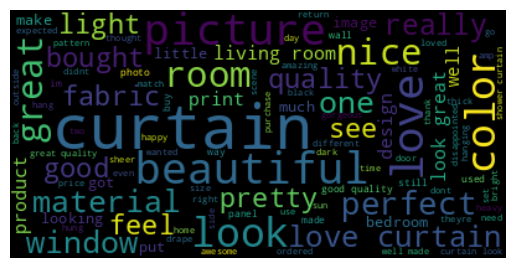

In [44]:
plt.figure()
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Görev 3: Duygu Analizi

    # Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz
    # Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

In [45]:
sia = SentimentIntensityAnalyzer()

In [47]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [48]:
df["Review"][:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.5719
1    0.4404
2    0.7184
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.9080
8    0.0000
9    0.7096
Name: Review, dtype: float64

In [49]:
df["Review"][:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [50]:
df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [52]:
df["Sentiment_Label"].value_counts()

Sentiment_Label
pos    4764
neg     847
Name: count, dtype: int64

In [55]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg    3.390791
pos    4.586692
Name: Star, dtype: float64

#### NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.


# Görev 4: Makine öğrenmesine hazırlık!
        # Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.
        # Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
                  # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
                  # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
                  # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df["Review"], df["Sentiment_Label"], random_state=42)

In [64]:
# Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
           # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
           # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
           # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.
            
tfidf_vectorizer = TfidfVectorizer().fit(X_train)
X_train_tf_idf_word = tfidf_vectorizer.transform(X_train)
X_test_tf_idf_word = tfidf_vectorizer.transform(X_test)

In [65]:
###############################
# Görev 5: Modelleme (Lojistik Regresyon)
###############################
log_model = LogisticRegression().fit(X_train_tf_idf_word, y_train)

In [66]:
# Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız

y_pred = log_model.predict(X_test_tf_idf_word)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.90      0.33      0.49       223
         pos       0.89      0.99      0.94      1180

    accuracy                           0.89      1403
   macro avg       0.89      0.66      0.71      1403
weighted avg       0.89      0.89      0.87      1403



In [67]:
cross_val_score(log_model, X_test_tf_idf_word, y_test, cv=5).mean()

0.8546034570411795

In [70]:
random_review = pd.Series(df["Review"].sample(1).values)
yeni_yorum = CountVectorizer().fit(X_train).transform(random_review)
pred = log_model.predict(yeni_yorum)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  love woodsy feel color curtain real departure usual neutral like change fabric soft silkyshiny black filter alot light 
 Prediction: ['pos']
